<a href="https://colab.research.google.com/github/VilPeas/TensorFlow/blob/main/NonLinearBinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification in TensorFlow
In this notebook we are going to look at building a binary classification model and optimising it as we go. I will discuss each change that is made to improve the model, starting from a very basic model to a working solution to the problem (iterating through all of the changes).
# Steps in modelling with TensorFlow
These are the steps that we have to go through in creating a model. We will work through these steps in this notebook for a Binary Classification problem.
1.   Prepare data (Import, inspect, visualise, shape)
2.   Build a model
3.   Compile the model
4.   Fit the model
5.   Evaluate the model
6.   Improve the model

---




# Preparing the data
We are going to generate some data for this exercise using sklearn make_circles function.

In [1]:
# Generating some data to view and fit.
from sklearn.datasets import make_circles

# Declare the number of circles
n_samples = 1000

# Create some samples
X,y = make_circles(n_samples, noise=0.03, random_state=42)

## Inspecting the data

In [2]:
import pandas as pd

# Turn dataset into a Pandas DataFrame
circles = pd.DataFrame({"X0":X[:,0], "X1": X[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
# This dataset has 2 attributes and a binary label (0 or 1).
# This is therefore a binary classification problem.

## Visualising the data

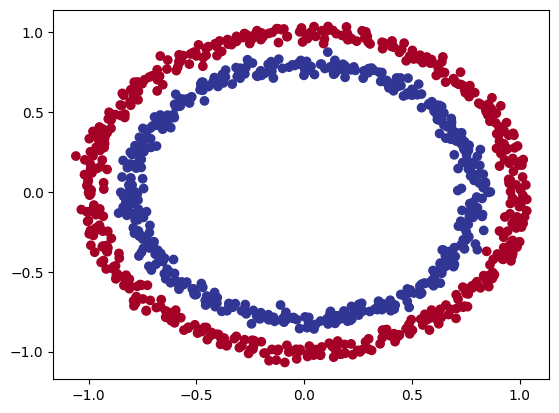

In [3]:
# Visualise with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# We're going to need to build a model that is able to distinguish between
# (classify) blue and red circles in the data above.

## Data shapes
We need to know the input and output shapes in order to make a neural network that can classify between red and blue circles.

In [4]:
# Check the shapes of our features and labels.
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# X has 1,000 samples and has 2 dimensions, y also has 1,000 samples but is a scalar

# Build the (very basic) model

This is step two in our sequence of creating a classification model.

In [5]:
import tensorflow as tf
# Set random seed for reproducibility
tf.random.set_seed(42)

In [6]:
# Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
Using the model we just declared, let's compile the model now.

In [7]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
This is where we fit the model that we've just compiled.

In [8]:
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.6335 - accuracy: 0.5180
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.6219 - accuracy: 0.5280
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 4.5108 - accuracy: 0.5270
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 4.5045 - accuracy: 0.5300
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 4.4876 - accuracy: 0.5300


In [ ]:
# So after fitting the model we're only getting 49% accuracy.

# Improving the model
What steps could we take to improve the model?

* Adding layers
* Increasing the number of hidden units
* Change the activation functions
* Change the optimisation functions
* Change the learning rate
* Fit on more data
* Fit for longer (more epochs)

**1) A good idea may be to train for longer (i.e. increase the number of epochs)**

In [9]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

We've not really improved the model by training for longer but rather we've tended towards a 50% accuracy. In a binary classification problem this means we're just guessing. We need to take further steps to improve the model.

**2) The next thing we could do is add some more layers to the model (as we currently only have one) and change the number of hidden units.**

In [51]:
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"), # Non-linear activation function
    tf.keras.layers.Dense(6, activation="relu"), # Non-linear activation function
    tf.keras.layers.Dense(1, activation="sigmoid") # Binary classification requires one output neuron
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=2500, verbose=0)

# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000


[0.0052253808826208115, 1.0]

Despite adding another layer to the neural network we are still only getting 50% accuracy. This means we need to take further steps to improve the model.

# Visualising the model

We're going to need to visualise our model so that we can see where our model is going wrong. We can do this by visualising the predictions that our model is making and having a look at the decision boundary.

These are the steps we need to take to do that:
* Take in a trained model of features (X) and labels (y).
* Create a meshgrid of the various "X" values.
* Make predictions accross the meshgrid.
* Plot the predictions and a line between the class zones.


In [52]:
import numpy as np

In [53]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting "X".
  """
  # Define axis boundaries of the plot and create a meshgrid
  X_min, X_max = X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min, y_max = X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                      np.linspace(y_min, y_max, 100))
  X_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(X_in)

  # Check for multi-class labels
  if len(y_pred[0]) > 1:
    print("Doing multi-class classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Doing binary classification


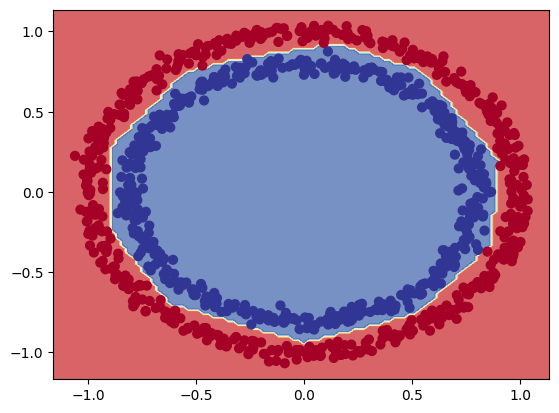

In [54]:
plot_decision_boundary(model_2, X, y)